<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1660 non-null   object 
 1   Open                       1660 non-null   float64
 2   High                       1660 non-null   float64
 3   Low                        1660 non-null   float64
 4   Close                      1660 non-null   float64
 5   WAP                        1660 non-null   float64
 6   No. of Shares              1660 non-null   float64
 7   No. of Trades              1660 non-null   float64
 8   Total Turnover             1660 non-null   float64
 9   Deliverable Quantity       1660 non-null   float64
 10  % Deli. Qty to Traded Qty  1660 non-null   float64
 11  Spread H-L                 1660 non-null   float64
 12  Spread C-O                 1660 non-null   float64
dtypes: float64(12), object(1)
memory usage: 168.7+ K

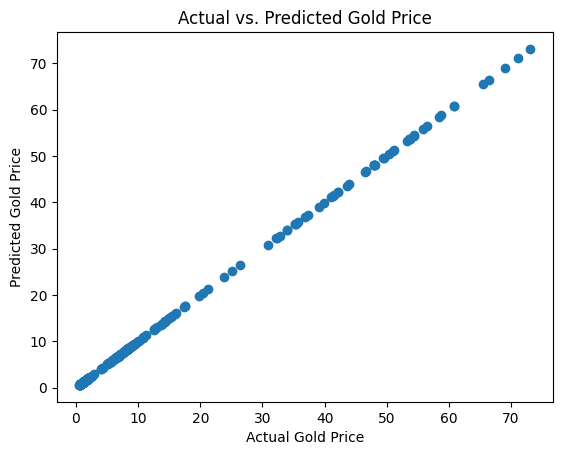

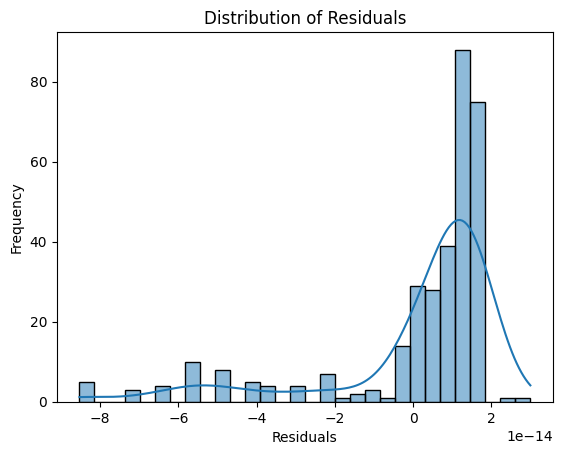

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


goldData = pd.read_csv('GoldPriceData.csv')
goldData.head()
goldData.info()
goldData.describe()
goldData.isnull().sum()

X=goldData.drop(['Date','Close'],axis=1)
y=goldData['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.title("Actual vs. Predicted Gold Price")
plt.show()

sns.histplot(y_test - y_pred, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
dl_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1])),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
dl_model.compile(optimizer='adam', loss='mean_squared_error')
history = dl_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 356.9962 - val_loss: 289.2898
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 180.1638 - val_loss: 53.9043
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 42.9738 - val_loss: 26.3402
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.1276 - val_loss: 14.2552
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.9002 - val_loss: 7.9223
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.4701 - val_loss: 4.1979
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.4824 - val_loss: 2.7637
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.0994 - val_loss: 2.9973
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.0376 - val_loss: 1.7477
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6802 - val_loss: 1.9100
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6084 - val_loss: 1.5860
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7

In [ ]:
loss = dl_model.evaluate(X_test, y_test)
print("Mean Squared Error on Test Data:", loss)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2299 
Mean Squared Error on Test Data: 0.19769006967544556


In [ ]:
y_pred_dl = dl_model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
mse_dl = mean_squared_error(y_test, y_pred_dl)
rmse_dl = np.sqrt(mse_dl)
r2_dl = r2_score(y_test, y_pred_dl)

In [ ]:
print("Mean Squared Error (DL):", mse_dl)
print("Root Mean Squared Error (DL):", rmse_dl)
print("R-squared (DL):", r2_dl)

Mean Squared Error (DL): 0.19769011705559414
Root Mean Squared Error (DL): 0.4446235678139364
R-squared (DL): 0.9992865003844055


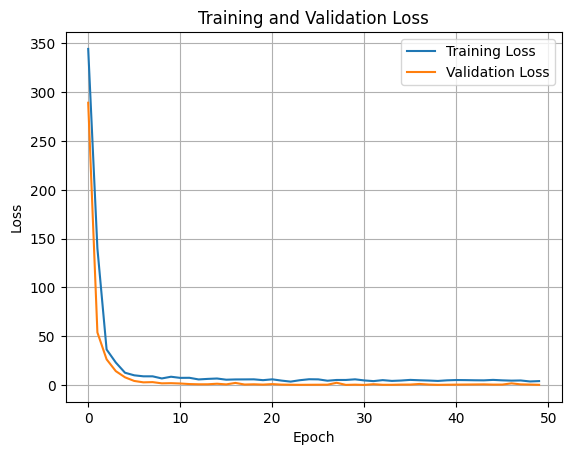

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()

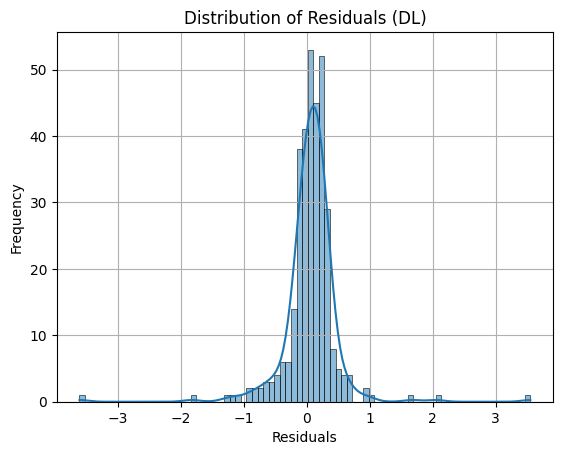

In [ ]:
sns.histplot(y_test - y_pred_dl.flatten(), kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (DL)")
plt.grid(True)
plt.show()